## Environment Setting

In [152]:
import pandas as pd #data handlig
import numpy as np
from gsdmm.mgp import MovieGroupProcess

#preprocessing data
import nltk
from nltk.tokenize import RegexpTokenizer
import replacers #making-program "replacers.py"
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.manifold import TSNE
from stopwords import stopwords

from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline

## Load Data Set

In [2]:
df = pd.read_csv('./data/pre_review1000.csv', encoding='949')
df = df.drop(df.columns[0], axis=1)
print(df.shape)
df.head()

(1000, 1)


,review
0,The only positive thing about this is using it...
1,"app on i Phone does not work, cannot delete it..."
2,"The sound is unbelievably good; however, I've ..."
3,Family loved it!
4,"I enjoy my echo it is very satisfying, thank y..."


## Pre-processing

We want to use review text only for text clustering.

In [3]:
reviewList = df['review']
print(type(reviewList))
reviewList[0]

<class 'pandas.core.series.Series'>


'The only positive thing about this is using it at low volume. The range isn’t there.  The Bluetooth is decent. The line in option didn’t work.  If I could have found the receipt I would have taken it back.  I will use it at work since it functions best at low tone. But honestly. My iPhone 8 is right behind it speaker quality wise and my sonos speakers all blow this out of the water on every level.  It just can’t compare to them yet. .  I am rather disappointed with this amazon device..'

Making a nested list of review to match the clustering input data type.

In [318]:
newList = [text for text in reviewList]
print(type(newList))
#newList

<class 'list'>


Change review text to all lowercase.

In [317]:
lower_text = [str(line).lower() for line in newList]
#lower_text

Explode all abbreviations. Remove the apostrophe to restore the original sentence.

In [319]:
replacer = replacers.RegexpReplacer()
decomp_words_text = [replacer.replace(line) for line in lower_text]
#decomp_words_text

Create a token by disassembling each review sentence.

In [7]:
def tokenize(list_type):
    
    t = RegexpTokenizer("[\w]+")
    tokenized_list = []

    for word in list_type:
        tokens = t.tokenize(word)
        tokenized_list.append(tokens)
    
    return tokenized_list

In [379]:
token = tokenize(decomp_words_text)
print(len(token))
#token

1000


The above preprocessing process is the same as the existing method(our project).

-------------------------------------

## Text Clustering with GSDMM

"A Dirichlet Multinomial Mixture Model-based Approach for Short Text Clustering" written by Jianhua Yin and Jianyong Wang 

A function that checks for unique words.

In [9]:
def compute_Voca(texts):
    V = set()
    for text in texts:
        for word in text:
            V.add(word)
    return V

Execution result

In [11]:
size = len(compute_Voca(token))
size

2822

Set the parameters(K, alpha, beta)

In [12]:
mgp = MovieGroupProcess(K=15, n_iters=100, alpha=0.1, beta=0.1)

### Model fitting

In [13]:
y = mgp.fit(token, size)

In stage 0: transferred 868 clusters with 15 clusters populated
In stage 1: transferred 595 clusters with 15 clusters populated
In stage 2: transferred 417 clusters with 14 clusters populated
In stage 3: transferred 293 clusters with 10 clusters populated
In stage 4: transferred 277 clusters with 8 clusters populated
In stage 5: transferred 232 clusters with 9 clusters populated
In stage 6: transferred 226 clusters with 7 clusters populated
In stage 7: transferred 200 clusters with 7 clusters populated
In stage 8: transferred 177 clusters with 7 clusters populated
In stage 9: transferred 184 clusters with 7 clusters populated
In stage 10: transferred 176 clusters with 7 clusters populated
In stage 11: transferred 165 clusters with 6 clusters populated
In stage 12: transferred 156 clusters with 7 clusters populated
In stage 13: transferred 165 clusters with 5 clusters populated
In stage 14: transferred 159 clusters with 5 clusters populated
In stage 15: transferred 163 clusters with 6 c

In [14]:
len(y)

1000

In [15]:
set(y)

{0, 4, 6, 7, 14}

In [16]:
cluster = {
    'cluster': y,
    'review': decomp_words_text
}

export = pd.DataFrame.from_dict(cluster)

In [17]:
export.to_csv('cluster_review.csv')

------------------------------------------------

Removing Stopwords same as pLSA

In [248]:
stops = nltk.corpus.stopwords.words('english')
newstops = stops + stopwords

In [368]:
# Cluster14
Textcluster14 = list(export[export['cluster']==14]['review'])
lowerText1 = [line.lower() for line in Textcluster14]
decompText1 = [replacer.replace(line) for line in lowerText1]
token_1 = tokenize_stream(decompText1)
token_1 = [line for line in token_1 if line not in newstops]
clusterList1 = list(Counter(token_1).items())
clusterList1 = sorted(clusterList1, key=itemgetter(1), reverse=True)

In [369]:
# Cluster7
Textcluster7 = list(export[export['cluster']==7]['review'])
lowerText2 = [line.lower() for line in Textcluster7]
decompText2 = [replacer.replace(line) for line in lowerText2]
token_2 = tokenize_stream(decompText2)
token_2 = [line for line in token_2 if line not in newstops]
clusterList2 = list(Counter(token_2).items())
clusterList2 = sorted(clusterList2, key=itemgetter(1), reverse=True)

In [370]:
s = pd.DataFrame(clusterList1, columns=['Features', 'Counts'])[5:25]
s1 = pd.DataFrame(clusterList2, columns=['Features', 'Counts'])[:20]

In [371]:
features1 = list(s['Features'].values.tolist())
values1 = list(s['Counts'].values.tolist())

features2 = list(s1['Features'].values.tolist())
values2 = list(s1['Counts'].values.tolist())

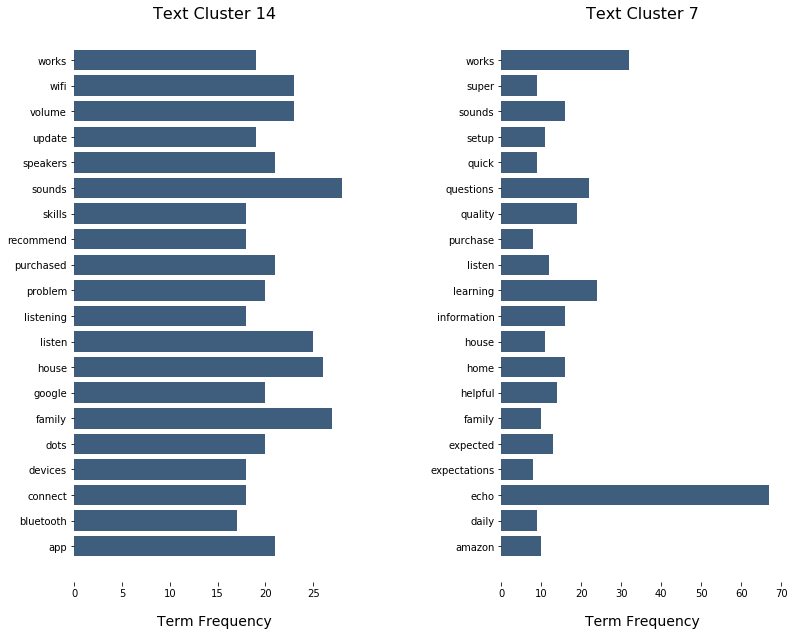

In [372]:
# Visualization with Bar chart
fig = plt.figure(figsize=(12, 9), facecolor="w")
ax = fig.add_subplot(1, 2, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlabel("Term Frequency", labelpad=16, fontsize=14)
ax.set_title("Text Cluster 14", fontsize=16)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.barh(features1, values1, align='center', color='#3F5D7D')
ax.set_yticks(features1)
#ax.set_ylim([-1, x[-1]+1])
plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
yticks = ax.set_yticklabels(features1)

ax = fig.add_subplot(1, 2, 2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlabel("Term Frequency", labelpad=16, fontsize=14)
ax.set_title("Text Cluster 7", fontsize=16)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.barh(features2, values2, align='center', color='#3F5D7D')
ax.set_yticks(features2)
#ax.set_ylim([-1, x[-1]+1])
plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
yticks = ax.set_yticklabels(features2)

plt.show()

In [373]:
# Cluster4
Textcluster4 = list(export[export['cluster']==4]['review'])
lowerText3 = [line.lower() for line in Textcluster4]
decompText3 = [replacer.replace(line) for line in lowerText3]
token_3 = tokenize_stream(decompText3)
token_3 = [line for line in token_3 if line not in newstops]
clusterList3 = list(Counter(token_3).items())
clusterList3 = sorted(clusterList3, key=itemgetter(1), reverse=True)

In [374]:
# Cluster6
Textcluster6 = list(export[export['cluster']==6]['review'])
lowerText4 = [line.lower() for line in Textcluster6]
decompText4 = [replacer.replace(line) for line in lowerText4]
token_4 = tokenize_stream(decompText4)
token_4 = [line for line in token_4 if line not in newstops]
clusterList4 = list(Counter(token_4).items())
clusterList4 = sorted(clusterList4, key=itemgetter(1), reverse=True)

In [375]:
s3 = pd.DataFrame(clusterList3, columns=['Features', 'Counts'])[:20]
s4 = pd.DataFrame(clusterList4, columns=['Features', 'Counts'])[:20]

In [376]:
features3 = list(s3['Features'].values.tolist())
values3 = list(s3['Counts'].values.tolist())

features4 = list(s4['Features'].values.tolist())
values4 = list(s4['Counts'].values.tolist())

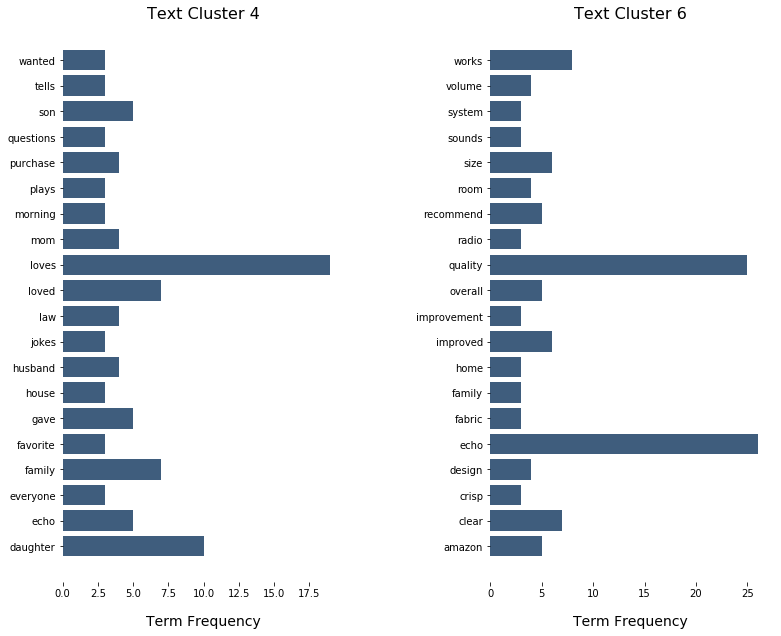

In [377]:
# Visualization with Bar chart
fig = plt.figure(figsize=(12, 9), facecolor="w")
ax = fig.add_subplot(1, 2, 1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlabel("Term Frequency", labelpad=16, fontsize=14)
ax.set_title("Text Cluster 4", fontsize=16)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.barh(features3, values3, align='center', color='#3F5D7D')
ax.set_yticks(features3)
#ax.set_ylim([-1, x[-1]+1])
plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
yticks = ax.set_yticklabels(features3)

ax = fig.add_subplot(1, 2, 2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlabel("Term Frequency", labelpad=16, fontsize=14)
ax.set_title("Text Cluster 6", fontsize=16)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
ax.barh(features4, values4, align='center', color='#3F5D7D')
ax.set_yticks(features4)
#ax.set_ylim([-1, x[-1]+1])
plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
yticks = ax.set_yticklabels(features4)

plt.show()

-----------------------------------

Reference

- Visualizaiton using t-SNE

In [320]:
# related to t-SNE
A_tfidf_sp = tfidf.fit_transform(Textcluster14)  # need to attr. max_features=50 
tfidf_dict = tfidf.get_feature_names()
#print(tfidf_dict)

In [51]:
data_array = A_tfidf_sp.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(358, 50)

In [52]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)
data_array.shape

(358, 50)

In [53]:
data_array.T.shape

(50, 358)

In [54]:
Z = tsne.fit_transform(data_array.T)

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 1.252526
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.203621
[t-SNE] Error after 1800 iterations: 0.504290


In [55]:
print(Z[0:5])
print('Top words: ',len(Z))

[[  60.04283524   -5.24120045]
 [-122.28665161   21.90007973]
 [ -39.95552063  -65.68734741]
 [  75.25675201 -109.78327179]
 [ 108.33803558   29.7869854 ]]
Top words:  50


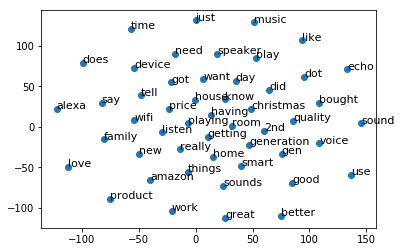

In [56]:
#path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(size=11)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.figure(figsize=(14,4))
plt.draw()

-----------------------

Reference Functions

In [139]:
def tokenize_stream(list_type):
    
    t = RegexpTokenizer("[\w]+")
    tokenized_list = []

    for word in list_type:
        tokens = t.tokenize(word)
        tokenized_list += tokens
    
    return tokenized_list

In [106]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()